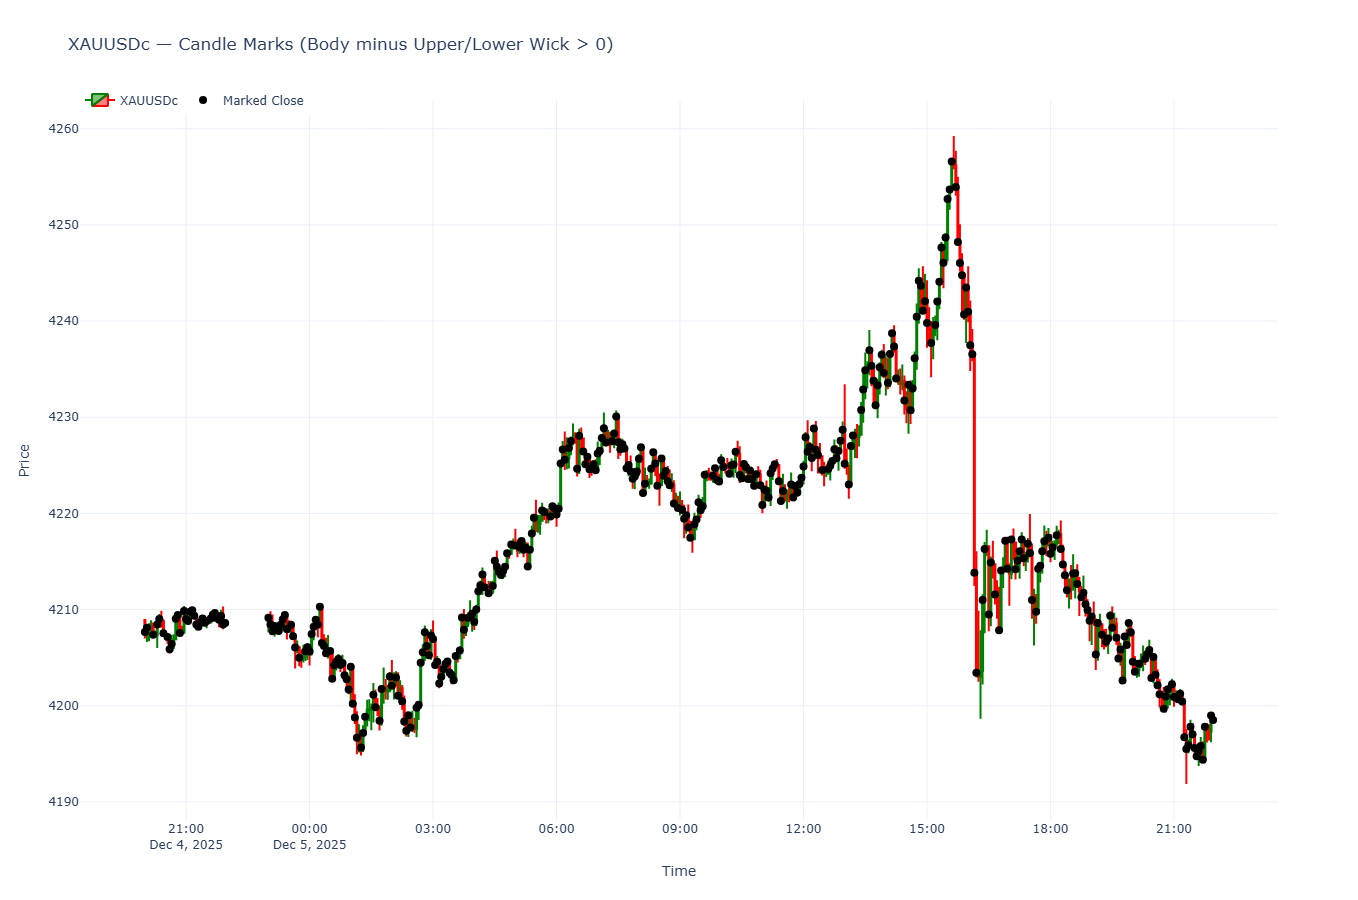

In [3]:
import MetaTrader5 as mt5 
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from datetime import datetime, timedelta

# -------------------------
# 1. Initialize MT5
# -------------------------
if not mt5.initialize():
    print("MT5 initialization failed")
    mt5.shutdown()

# -------------------------
# 2. Fetch 3-minute data
# -------------------------
symbol = "XAUUSDc"
timeframe = mt5.TIMEFRAME_M3
n_bars = 500
utc_from = datetime.now() - timedelta(days=5)

rates = mt5.copy_rates_from(symbol, timeframe, utc_from, n_bars)
mt5.shutdown()

# -------------------------
# 3. Convert to DataFrame
# -------------------------
df = pd.DataFrame(rates)
df['time'] = pd.to_datetime(df['time'], unit='s')
df.set_index('time', inplace=True)

# -------------------------
# 4. Remove non-trading periods
# -------------------------
df = df[df.index.dayofweek < 5]

# -------------------------
# 5. Calculations
# -------------------------
df['range'] = df['high'] - df['low']
df['body'] = abs(df['close'] - df['open'])
df['wick'] = df['range'] - df['body']

df['upper_wick'] = df['high'] - df[['open', 'close']].max(axis=1)
df['lower_wick'] = df[['open', 'close']].min(axis=1) - df['low']

df['body_minus_upper'] = df['body'] - df['upper_wick']
df['body_minus_lower'] = df['body'] - df['lower_wick']

# Mark if either condition is true
df['mark_signal'] = (df['body_minus_upper'] > 0) | (df['body_minus_lower'] > 0)

# -------------------------
# 6. Plot (Candlestick + Markers only)
# -------------------------
fig = go.Figure()

# Candlestick
fig.add_trace(go.Candlestick(
    x=df.index,
    open=df['open'],
    high=df['high'],
    low=df['low'],
    close=df['close'],
    name='XAUUSDc',
    increasing_line_color='green',
    decreasing_line_color='red'
))

# Markers on close when conditions are TRUE
fig.add_trace(go.Scatter(
    x=df.index,
    y=np.where(df['mark_signal'], df['close'], np.nan),
    mode='markers',
    marker=dict(size=8, color='black'),
    name='Marked Close'
))

# Layout
fig.update_layout(
    template='plotly_white',
    title='XAUUSDc — Candle Marks (Body minus Upper/Lower Wick > 0)',
    xaxis=dict(title='Time', rangeslider=dict(visible=False)),
    yaxis=dict(title='Price'),
    height=900,
    legend=dict(orientation='h', y=1.02, x=0)
)

fig.show()


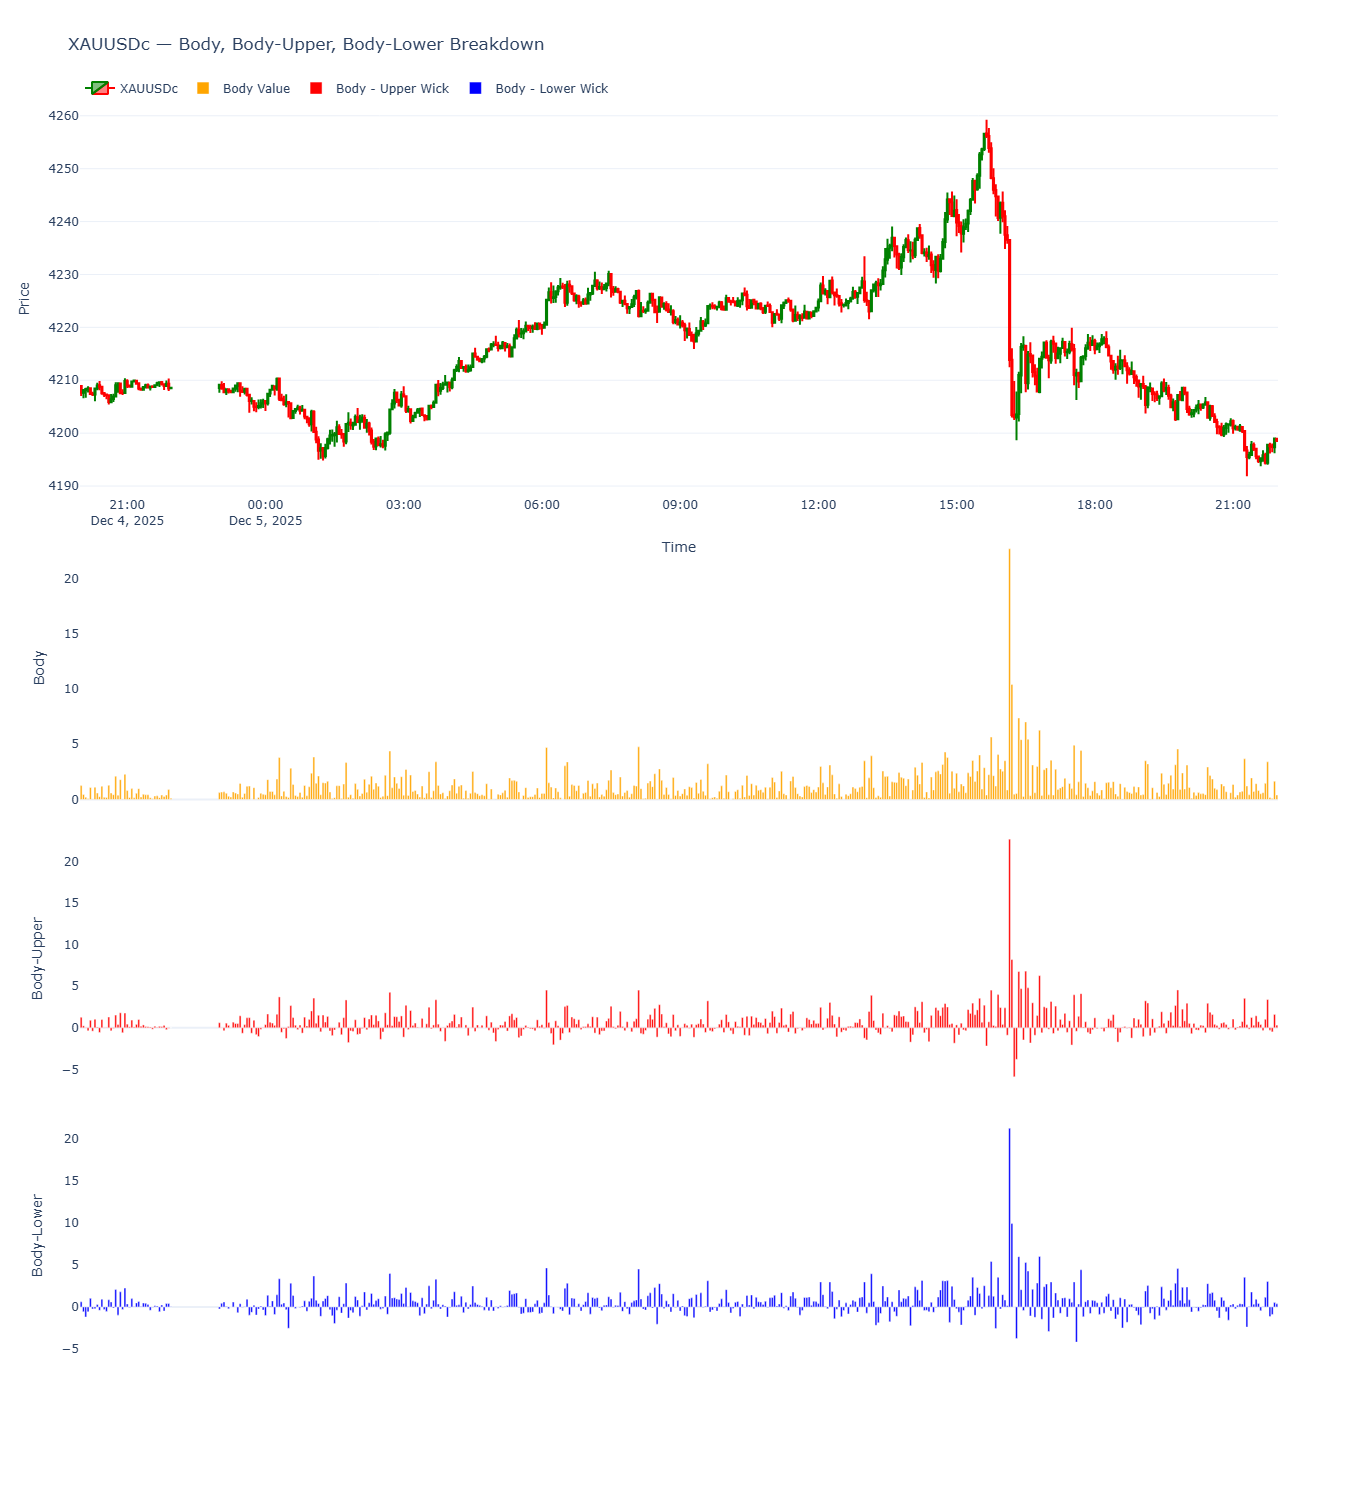

In [4]:
import MetaTrader5 as mt5 
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from datetime import datetime, timedelta

# -------------------------
# 1. Initialize MT5
# -------------------------
if not mt5.initialize():
    print("MT5 initialization failed")
    mt5.shutdown()

# -------------------------
# 2. Fetch 3-minute data
# -------------------------
symbol = "XAUUSDc"
timeframe = mt5.TIMEFRAME_M3
n_bars = 500
utc_from = datetime.now() - timedelta(days=5)

rates = mt5.copy_rates_from(symbol, timeframe, utc_from, n_bars)
mt5.shutdown()

# -------------------------
# 3. Convert to DataFrame
# -------------------------
df = pd.DataFrame(rates)
df['time'] = pd.to_datetime(df['time'], unit='s')
df.set_index('time', inplace=True)

# -------------------------
# 4. Remove non-trading periods
# -------------------------
df = df[df.index.dayofweek < 5]

# -------------------------
# 5. Calculations
# -------------------------
df['range'] = df['high'] - df['low']
df['body'] = abs(df['close'] - df['open'])
df['upper_wick'] = df['high'] - df[['open', 'close']].max(axis=1)
df['lower_wick'] = df[['open', 'close']].min(axis=1) - df['low']

df['body_minus_upper'] = df['body'] - df['upper_wick']
df['body_minus_lower'] = df['body'] - df['lower_wick']

# -------------------------
# 6. Plot (4 panes)
# -------------------------
fig = go.Figure()

# -----------------------------------------------------
# Pane 1: Candlestick
# -----------------------------------------------------
fig.add_trace(go.Candlestick(
    x=df.index,
    open=df['open'],
    high=df['high'],
    low=df['low'],
    close=df['close'],
    name='XAUUSDc',
    increasing_line_color='green',
    decreasing_line_color='red'
))

# -----------------------------------------------------
# Pane 2: Body Value
# -----------------------------------------------------
fig.add_trace(go.Bar(
    x=df.index,
    y=df['body'],
    name='Body Value',
    marker_color='orange',
    yaxis='y2'
))

# -----------------------------------------------------
# Pane 3: Body Minus Upper Wick
# -----------------------------------------------------
fig.add_trace(go.Bar(
    x=df.index,
    y=df['body_minus_upper'],
    name='Body - Upper Wick',
    marker_color='red',
    yaxis='y3'
))

# -----------------------------------------------------
# Pane 4: Body Minus Lower Wick
# -----------------------------------------------------
fig.add_trace(go.Bar(
    x=df.index,
    y=df['body_minus_lower'],
    name='Body - Lower Wick',
    marker_color='blue',
    yaxis='y4'
))

# -------------------------
# Layout
# -------------------------
fig.update_layout(
    template='plotly_white',
    title='XAUUSDc — Body, Body-Upper, Body-Lower Breakdown',
    xaxis=dict(title='Time', rangeslider=dict(visible=False)),

    yaxis=dict(title='Price', domain=[0.70, 1.00]),
    yaxis2=dict(title='Body', domain=[0.47, 0.67], showgrid=False),
    yaxis3=dict(title='Body-Upper', domain=[0.25, 0.45], showgrid=False),
    yaxis4=dict(title='Body-Lower', domain=[0.05, 0.23], showgrid=False),

    height=1500,
    legend=dict(orientation='h', y=1.02, x=0)
)

fig.show()


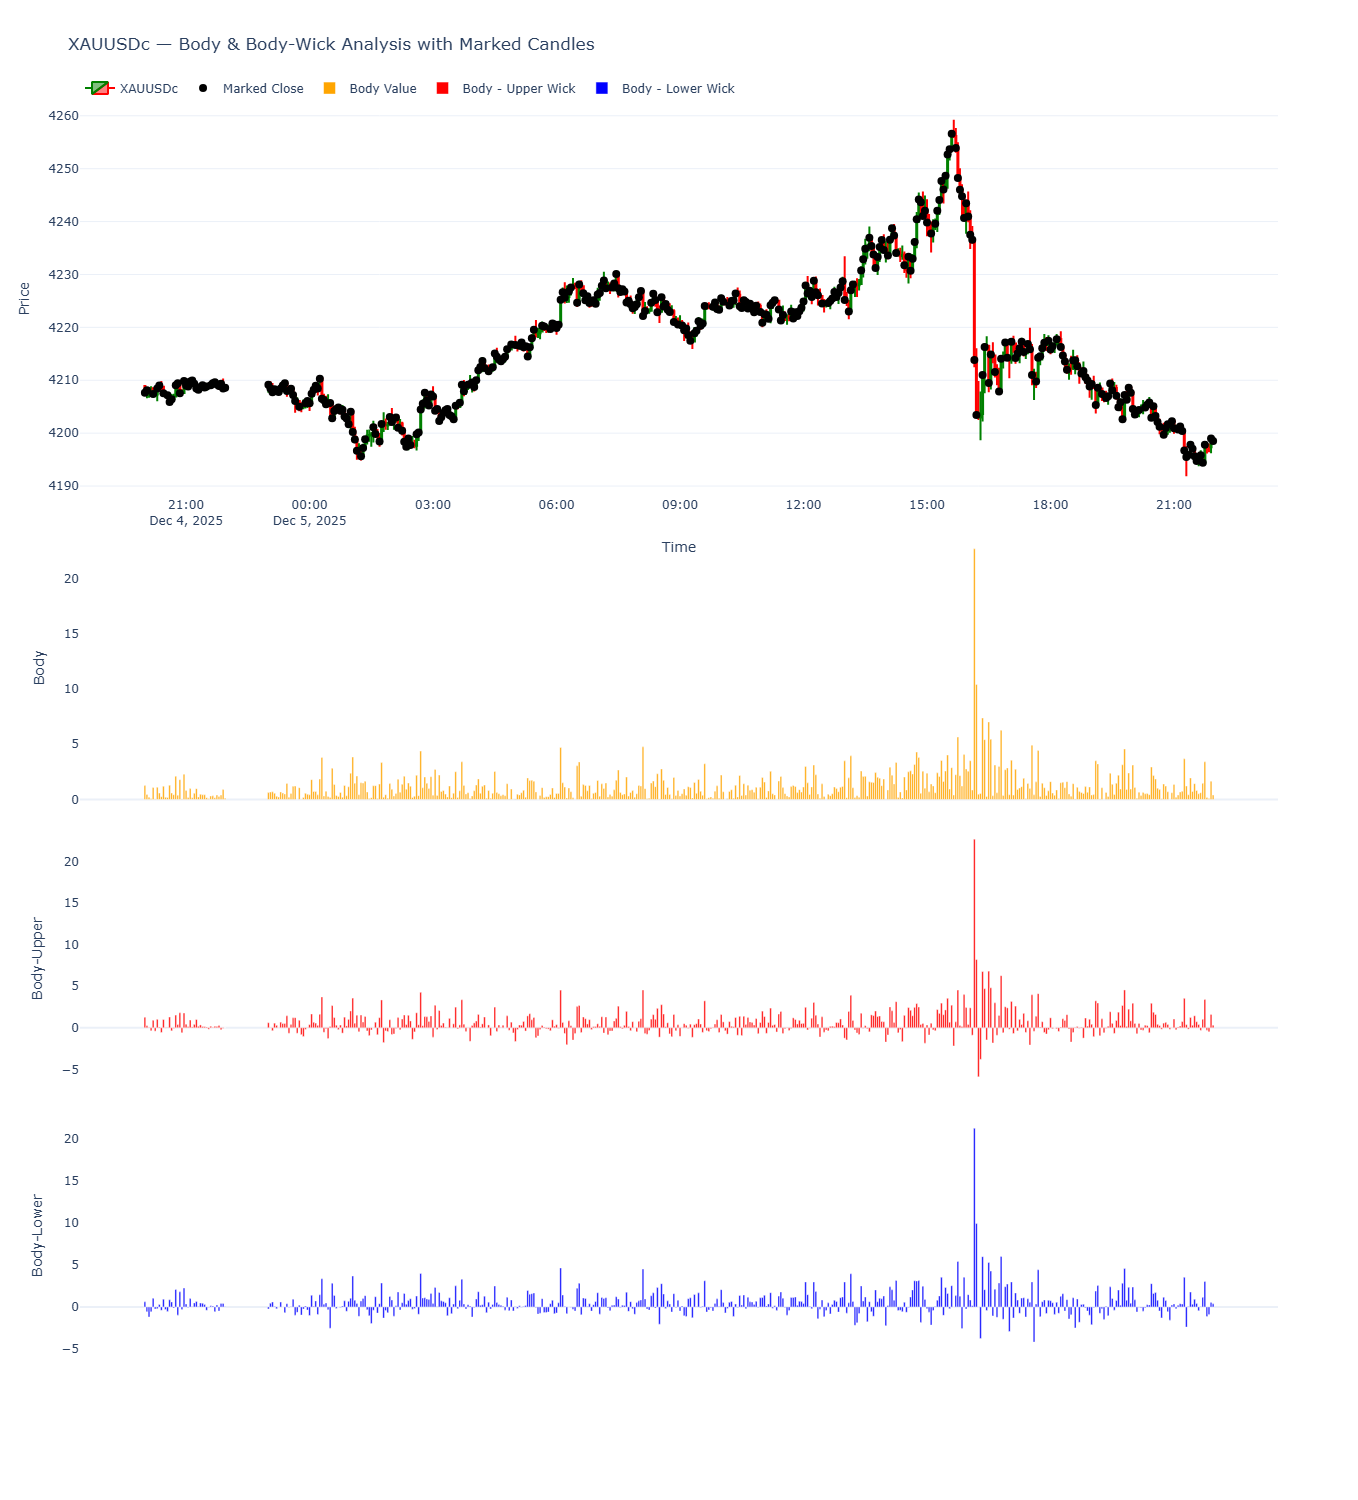

In [5]:
import MetaTrader5 as mt5 
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from datetime import datetime, timedelta

# -------------------------
# 1. Initialize MT5
# -------------------------
if not mt5.initialize():
    print("MT5 initialization failed")
    mt5.shutdown()

# -------------------------
# 2. Fetch 3-minute data
# -------------------------
symbol = "XAUUSDc"
timeframe = mt5.TIMEFRAME_M3
n_bars = 500
utc_from = datetime.now() - timedelta(days=5)

rates = mt5.copy_rates_from(symbol, timeframe, utc_from, n_bars)
mt5.shutdown()

# -------------------------
# 3. Convert to DataFrame
# -------------------------
df = pd.DataFrame(rates)
df['time'] = pd.to_datetime(df['time'], unit='s')
df.set_index('time', inplace=True)

# -------------------------
# 4. Remove non-trading periods
# -------------------------
df = df[df.index.dayofweek < 5]

# -------------------------
# 5. Calculations
# -------------------------
df['body'] = abs(df['close'] - df['open'])
df['upper_wick'] = df['high'] - df[['open', 'close']].max(axis=1)
df['lower_wick'] = df[['open', 'close']].min(axis=1) - df['low']

df['body_minus_upper'] = df['body'] - df['upper_wick']
df['body_minus_lower'] = df['body'] - df['lower_wick']

# Mark signal if either condition is true
df['mark_signal'] = (df['body_minus_upper'] > 0) | (df['body_minus_lower'] > 0)

# -------------------------
# 6. Plot
# -------------------------
fig = go.Figure()

# Pane 1: Candlestick
fig.add_trace(go.Candlestick(
    x=df.index,
    open=df['open'],
    high=df['high'],
    low=df['low'],
    close=df['close'],
    name='XAUUSDc',
    increasing_line_color='green',
    decreasing_line_color='red'
))

# Marker on close when condition is true
fig.add_trace(go.Scatter(
    x=df.index,
    y=np.where(df['mark_signal'], df['close'], np.nan),
    mode='markers',
    marker=dict(size=8, color='black'),
    name='Marked Close'
))

# Pane 2: Body values
fig.add_trace(go.Bar(
    x=df.index,
    y=df['body'],
    name='Body Value',
    marker_color='orange',
    yaxis='y2'
))

# Pane 3: Body - Upper Wick
fig.add_trace(go.Bar(
    x=df.index,
    y=df['body_minus_upper'],
    name='Body - Upper Wick',
    marker_color='red',
    yaxis='y3'
))

# Pane 4: Body - Lower Wick
fig.add_trace(go.Bar(
    x=df.index,
    y=df['body_minus_lower'],
    name='Body - Lower Wick',
    marker_color='blue',
    yaxis='y4'
))

# -------------------------
# Layout
# -------------------------
fig.update_layout(
    template='plotly_white',
    title='XAUUSDc — Body & Body-Wick Analysis with Marked Candles',
    xaxis=dict(title='Time', rangeslider=dict(visible=False)),

    yaxis=dict(title='Price', domain=[0.70, 1.00]),
    yaxis2=dict(title='Body', domain=[0.47, 0.67], showgrid=False),
    yaxis3=dict(title='Body-Upper', domain=[0.25, 0.45], showgrid=False),
    yaxis4=dict(title='Body-Lower', domain=[0.05, 0.23], showgrid=False),

    height=1500,
    legend=dict(orientation='h', y=1.02, x=0)
)

fig.show()
